In [16]:
%matplotlib inline

In [43]:
import os
import cv2
from xml.dom import minidom
import matplotlib.pyplot as plt
from math import floor
from random import random
import scipy as sp


class ArtificialHandwrittingObject:
    
    def __init__(self, name, img):
        self.name = name
        self.image = img

class ArtificialHandwritting:
    
    def __init__(self, datasetDir, scale, image_height):
        self.scale = scale
        self.height = image_height
        self.datasetDirectory = datasetDir
        self.data = {}
        self.initOffsets()
        
        for f_name in os.listdir(datasetDir):
            if not f_name.endswith(".xml"):
                continue
            full_path = datasetDir + f_name
            print(full_path)
            self.process_xml(full_path)
            
    def initOffsets(self):
        self.offsets = {
            'a': 0,
            'b': -0.1,
            'c': 0,
            'd': 0,
            'e': 0,
            'f': -0.2,
            'g': +0.3,
            'h': 0,
            'i': -0.15,
            'j': +0.2,
            'k': 0,
            'l': -0.15,
            'm': 0,
            'n': 0,
            'o': 0,
            'p': 0,
            'q': +0.2,
            'r': 0,
            's': 0,
            't': -0.2,
            'u': 0,
            'v': 0,
            'w': 0,
            'x': 0,
            'y': +0.2,
            'z': 0,
        }
        
        
        
    def getValue(self, node, name):
        v  = node.getElementsByTagName(name) 
        if len(v) != 1:
            raise Exception()
        v = v[0].firstChild.data
        return v
    
    def make_word(self, word):
        center = self.height*0.5
        result = sp.ones([self.height, 1500], dtype="float64")
        candidates = []
        for k in self.data.keys():
            d = self.data[k]
            flag = True
            for s in word:
                if s not in d:
                    flag = False
                    break
            if flag:
                candidates.append(k)
        idx = floor(random()*len(candidates))
        img_file = candidates[idx]
        page = self.data[img_file]
        x = 0
        for s in word:
            s_idx = floor(len(page[s])*random())
            obj_im = page[s][s_idx].image
            c = 0.5*obj_im.shape[0]
            dy = 0 + floor(center - c + obj_im.shape[0]*(self.offsets[s]+random()*0.05))#+random()*0.05))
            #print(dy)
            #print(obj_im.dtype)
            result[dy: dy + obj_im.shape[0], x: x+obj_im.shape[1]] = obj_im
            x += obj_im.shape[1]
        return result, img_file
            
    def process_xml(self, f_path):
        
        xml_file = minidom.parse(f_path)
        #xml_file.normalize()
        annotation = xml_file.getElementsByTagName('annotation')
        if len(annotation) != 1:
            raise Exception()
        annotation = annotation[0]
        img_name = self.getValue(annotation, 'filename')
        image_file = self.datasetDirectory + img_name
        img = cv2.imread(image_file, 0)
        print(image_file)
        objects = annotation.getElementsByTagName('object')
        #print(len(objects))
        content = {}
        for obj in objects:
            name  = self.getValue(obj, 'name')
            if name not in content:
                content[name] = []
            x_min = int(self.getValue(obj, 'xmin'))
            y_min = int(self.getValue(obj, 'ymin'))
            x_max = int(self.getValue(obj, 'xmax'))
            y_max = int(self.getValue(obj, 'ymax'))
            obj_im = img[y_min: y_max, x_min: x_max]
            s = self.scale
            sh = obj_im.shape
            obj_im = cv2.resize(obj_im, (floor(sh[1]*s), floor(sh[0]*s)), cv2.INTER_LANCZOS4)
            if obj_im.shape[0] > self.height:
                continue
            obj_im = sp.float64(obj_im)    
            obj_im = (obj_im - obj_im.min())/(obj_im.max() - obj_im.min())
            handwr_obj = ArtificialHandwrittingObject(name, obj_im)
            content[name].append(handwr_obj)
        if img_name in self.data:
            raise Exception()
        self.data[img_name] = content
        

In [61]:
def cat_images(lst, out_file):
    l = []
    for n in lst:
        im = cv2.imread(n)
        l.append(im)
    r = sp.vstack(l)
    cv2.imwrite(out_file, r)

# cat_images(["/home/user/DL/VENV/MyLetters/my/0001.jpg",
# "/home/user/DL/VENV/MyLetters/my/0002.jpg",
# "/home/user/DL/VENV/MyLetters/my/0003.jpg",
# "/home/user/DL/VENV/MyLetters/my/0004.jpg",
# "/home/user/DL/VENV/MyLetters/my/0005.jpg"], "/home/user/DL/VENV/MyLetters/my.jpg")   

/home/user/DL/VENV/MyLetters/a01-026u.xml
/home/user/DL/VENV/MyLetters/a01-026u.png
/home/user/DL/VENV/MyLetters/a01-053u.xml
/home/user/DL/VENV/MyLetters/a01-053u.png
/home/user/DL/VENV/MyLetters/a01-107.xml
/home/user/DL/VENV/MyLetters/a01-107.png
/home/user/DL/VENV/MyLetters/a01-107u.xml
/home/user/DL/VENV/MyLetters/a01-107u.png
/home/user/DL/VENV/MyLetters/a01-128.xml
/home/user/DL/VENV/MyLetters/a01-128.png
/home/user/DL/VENV/MyLetters/my.xml
/home/user/DL/VENV/MyLetters/my.jpg
a01-053u.png


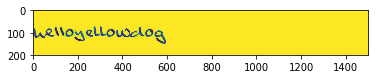

a01-128.png


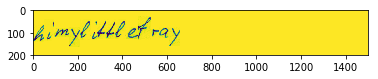

a01-053u.png


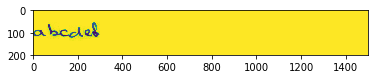

my.jpg


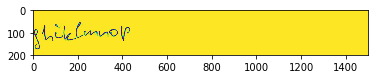

my.jpg


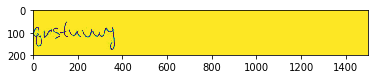

In [82]:
dataset = ArtificialHandwritting("/home/user/DL/VENV/MyLetters/", 1.0, 200)
w,f = dataset.make_word("helloyellowdog")
print(f)
plt.imshow(w)
plt.show()
w,f = dataset.make_word("himylittlefray")
print(f)
plt.imshow(w)
plt.show()

w, f = dataset.make_word("abcdef")#ghiklmnopqrstuvwy")
print(f)
plt.imshow(w)
plt.show()

w,f = dataset.make_word("ghiklmnop")#qrstuvwy")
print(f)
plt.imshow(w)
plt.show()

w,f = dataset.make_word("qrstuvwy")#qrstuvwy")
print(f)
plt.imshow(w)
plt.show()


In [45]:
import scipy as sp


In [46]:
sp.float64

numpy.float64